# A Plot of $k_{obs}$ vs. $\gamma [H_2O]$

This code will create the figure 9 in the discussion that plots $\log{k_{obs}} + mH_0$ vs. $\gamma_{H_2O} [H_2O]$ with $m = 0.62$ 

In [22]:
##############################################################
### Set up libraries and global variables
##############################################################
 
import interpolators   ### import the following functions from local library
# interpolators.MakeInterpolationFunctionForH0inH2SO4byPercentWt()
# interpolators.MakeInterpolationFunctionForH2OActivityinH2SO4byMoleFraction()
# interpolators.MakeInterpolationFunctionForH2OActivityinH2SO4byPercentWt()
# interpolators.MakeInterpolationFunctionForDensityofH2SO4byPercentWt()

import pandas as pd
pd.options.mode.chained_assignment = None    # no warning message and no exception is raised

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import curve_fit
from scipy.stats import linregress
from scipy.optimize import minimize
from scipy.optimize import minimize_scalar


from statsmodels.nonparametric.smoothers_lowess import lowess     # A function for interpolating a plot using the locally weighed scatterplot smoothing method. Returns smoothed x,y points
from scipy.interpolate import CubicSpline                         # A function for interpolating a plot using the cubic spline method. Returns an interpolation function.
from scipy.interpolate import interp1d                            # A function for interpolating a plot using the connect-the-dots method. Returns an interpolation function.
from scipy.interpolate import make_smoothing_spline               # A function for interpolating a plot using a Bspline algorithm. Returns an interpolation function.

from matplotlib.patches import PathPatch
from matplotlib.path import Path


#github_location = "https://raw.githubusercontent.com/blinkletter/4410PythonNotebooks/main/Class_30/data/"
github_location = "./data/"
github_H0_location = "https://raw.githubusercontent.com/blinkletter/4410PythonNotebooks/main/Class_08/data/H0_data/"
github_location_styles = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/styles/"
github_location_styles = "./styles/"
github_location_LFER_tables = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/data/"


molwtH2SO4 = 98.08
molwtH2O = 18.0
densityH2SO4 = 1.83
densityH2O = 1.000


In [23]:
##############################################################
### DATAFRAME for ESTER HYDROLYSIS KINETIC DATA
##############################################################

##############################################################
### Import the data and perform calculations
##############################################################

Data_File_Name = "Yates_Table1.csv"

Filename = github_location + Data_File_Name

df = pd.read_csv(Filename, 
                 delimiter = ",", 
                 skipinitialspace=True, 
#                 index_col="Substituent", 
                 comment = "#") 
#display(df)

df1 = (df.loc[df['Ester'] == 'MeOAc'])   ### Select only the MeOAc data
#df1 = (df1.loc[0:7])   ### Select only the given lines

##############################################################
### Perform calculations
##############################################################

df1["kobs"] = df1["kobs"] * 1E-2 * 60    # convert from 10^-2 min^-1 to s^-1
#df1["kobs"] = df1["kobs"]

PercentH2SO4 = df1["%H2SO4"]
molesH2SO4 = PercentH2SO4 / molwtH2SO4
PercentH2O = 100 - PercentH2SO4
molesH2O = PercentH2O / molwtH2O
total_moles = molesH2SO4 + molesH2O
mole_fraction_H2SO4 = molesH2SO4 / total_moles

df1["X_H2SO4"] = mole_fraction_H2SO4

interpolatorH0 = interpolators.MakeInterpolationFunctionForH0inH2SO4byPercentWt()
df1["H0"] = interpolatorH0(PercentH2SO4)

m = 0.62
df1["HS"] = df1["H0"] * m

df1["log_k_obs"] = np.log10(df1["kobs"])

interpolator_aH2O = interpolators.MakeInterpolationFunctionForH2OActivityinH2SO4byPercentWt()
df1["aH2O"] = interpolator_aH2O(PercentH2SO4)

interpolator_density = interpolators.MakeInterpolationFunctionForDensityofH2SO4byPercentWt()
density = interpolator_density(PercentH2SO4)

volume = 1000
gramsH2O = volume * density * PercentH2O/100
molesH2O = gramsH2O / molwtH2O    # per liter

df1["Molar_H2O"] = molesH2O
X_H2O = 1-df1["X_H2SO4"]          # mole fraction H2O in H2SO4
gamma_H2O = df1["aH2O"]/(X_H2O)   # activity coefficient for H2O in H2SO4
df1["Molar_aH2O"] = gamma_H2O * df1["Molar_H2O"]



# drop last four rows of df1
df1 = df1.iloc[:-3]
display(df1)

,Ester,%H2SO4,kobs,X_H2SO4,H0,HS,log_k_obs,aH2O,Molar_H2O,Molar_aH2O
0,MeOAc,14.1,0.9000,0.029243,-0.602729,-0.373692,-0.045757,0.929672,52.274995,50.062576
1,MeOAc,20.7,1.5660,0.045716,-1.037527,-0.643266,0.194792,0.873362,50.455747,46.177140
2,MeOAc,28.3,2.5320,0.067544,-1.511469,-0.937111,0.403464,0.778090,48.018423,40.069105
3,MeOAc,34.8,3.8460,0.089215,-1.999334,-1.239587,0.585009,0.668753,45.583388,33.470084
4,MeOAc,40.4,4.8840,0.110638,-2.418862,-1.499694,0.688776,0.556825,43.253973,27.081094
5,MeOAc,45.4,6.2400,0.132397,-2.793058,-1.731696,0.795185,0.449579,40.993888,21.242417
6,MeOAc,50.2,6.8400,0.156117,-3.233884,-2.005008,0.835056,0.346582,38.654075,15.875174
7,MeOAc,55.2,7.9800,0.184424,-3.781791,-2.344711,0.902003,0.246168,36.027011,10.874154
8,MeOAc,60.4,8.2800,0.218701,-4.396537,-2.725853,0.918030,0.156455,33.060974,6.620468
9,MeOAc,65.2,7.1400,0.255866,-5.004720,-3.102926,0.853698,0.091126,30.074416,3.682898


LinregressResult(slope=1.7515259792497506, intercept=-3.3102634372361317, rvalue=0.9992014397175438, pvalue=9.751778718446688e-17, stderr=0.021117831514764564, intercept_stderr=0.025185635593869025)


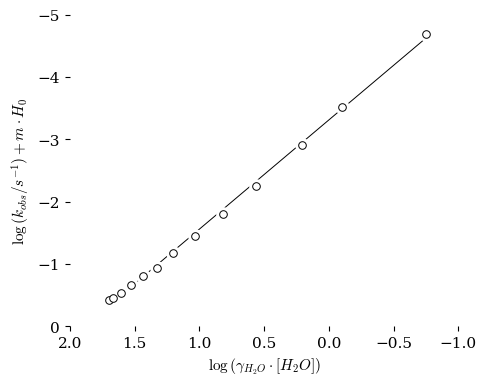

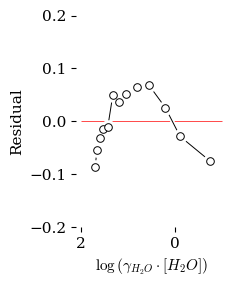

In [ ]:
###################################################
### MAKE PLOT
###################################################

pKa = -7.2
Ka = 10**-pKa

h_0 = 10**-df1["H0"]

m = 0.62

###################################################
### Select the data for ESTER HYDROLYSIS
###################################################

#x = np.log10(df1["aH2O"])
x = np.log10(df1["Molar_aH2O"])



#y = df1["log_k_obs"]
#y = df1["log_k_obs"]-np.log10(h_0**m)
#y = df1["log_k_obs"]-np.log10(h_0**m/(Ka**m + h_0**m))

y = df1["log_k_obs"] + m * df1["H0"]




###################################################
### Create figure for plot
###################################################

style = "tufte.mplstyle"
#style = "S2_classic2.mplstyle"
style_name = github_location_styles + style
plt.style.use(style_name)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  
#ax2 = ax.twinx()

###################################################
### Set up labels
###################################################

#x_label = r"$\%wt {H_2SO_4}$"
x_label = r"$\log{(\gamma_{H_2O} \cdot [{H_2O}])}$"

y_label = r"$\log{(k_{obs} / {s}^{-1})} + m\cdot H_0$"
#y_label = r"$\log{(k_{obs} / {s}^{-1})} + \log\frac{H_0^m}{K_a^m+H_0^m}$"
###################################################
### RATE vs ACIDITY Plot
###################################################

if True:                  # Set up axes for main plot
    ax.set(ylabel=y_label, xlabel=x_label,
           xlim=[2,-1],
           ylim=[0,-5]
           )

if True:                       # Data points for kobs vs Acidity
    ax.scatter(x, y, 
              marker = "o", s = 30, 
              color = "white", edgecolors = "black", linewidths=0.7, 
              zorder = 2)
    ax.scatter(x, y,           # White circle behind each data point 
              marker = "o", s = 90, 
              color = "white", 
              zorder = 1)


a = linregress(x,y)
print(a)
y_line = a.slope * x + a.intercept

ax.plot(x, y_line,    # Plot line fit
        "-", color = "black", linewidth=0.7, 
        zorder = 0)

plt.savefig("plots/01_F11_fig10.pdf")
plt.show()








###################################################
### Create figure for RESIDUAL plot
###################################################

style = "tufte.mplstyle"
#style = "S2_classic2.mplstyle"
style_name = github_location_styles + style
plt.style.use(style_name)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(2.5,3))  

###################################################
### Set up labels
###################################################

#x_label = r"$\%wt {H_2SO_4}$"
#x_label = r"$\log{a_{H_2O}}$"
x_label = r"$\log{(\gamma_{H_2O} \cdot [{H_2O}])}$"

y_label = "Residual"

###################################################
### Plot the residuals
###################################################

ax.set(ylabel=y_label, xlabel=x_label,
           xlim=[2.1,-1.1],
           ylim=[-.2,.2]
        )

ax.plot(x, y-y_line,    # Plot line fit
        "-", color = "white", linewidth=3, 
        zorder = 1)
ax.plot(x, y-y_line,    # Plot line fit
        "-", color = "black", linewidth=0.7, 
        zorder = 1)

ax.scatter(x, y-y_line,           # White circle behind each data point 
          marker = "o", s = 90, 
          color = "white", 
          zorder = 2)
ax.scatter(x, y-y_line, 
          marker = "o", s = 30, 
          color = "white", edgecolors = "black", linewidths=0.7, 
          zorder = 2)

#ax.hlines(0,np.min(x),np.max(x), color ="red", linewidths =0.5, zorder=0)
ax.hlines(0,2,-1, color ="red", linewidths =0.5, zorder=0)

plt.savefig("plots/01_F12_plotsfig10r.pdf")
plt.show()


LinregressResult(slope=0.9151122961421939, intercept=-1.5686277370024633, rvalue=0.9998797366765713, pvalue=2.935519684622164e-21, stderr=0.004279557065140137, intercept_stderr=0.0051039030532292196)


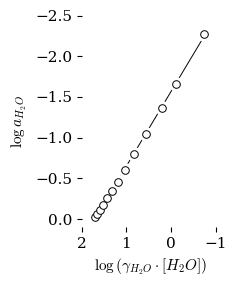

In [ ]:
###################################################
### a_H2O vs g_H2O*c_H2O
###################################################

#x = df1["Molar_aH2O"]
#y = df1["aH2O"]
x = np.log10(df1["Molar_aH2O"])
y = np.log10(df1["aH2O"])




###################################################
### Create figure for plot
###################################################

style = "tufte.mplstyle"
#style = "S2_classic2.mplstyle"
style_name = github_location_styles + style
plt.style.use(style_name)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(2.5,3))  
#ax2 = ax.twinx()

###################################################
### Set up labels
###################################################

#x_label = r"$\%wt {H_2SO_4}$"
x_label = r"$\log{(\gamma_{H_2O} \cdot [{H_2O}])}$"

#y_label = r"$\log{(k_{obs} / {s}^{-1})} + m\cdot H_0}$"
#y_label = r"$\log{(k_{obs} / {s}^{-1})} + \log\frac{H_0^m}{K_a^m+H_0^m}$"
y_label = r"$\log{a_{H_2O}}$"

###################################################
### RATE vs ACIDITY Plot
###################################################

if True:                  # Set up axes for main plot
    ax.set(ylabel=y_label, xlabel=x_label,
           xlim=[2,-1.1],
           ylim=[0.1,-2.5],
           xticks=[2,1,0,-1]
           )

if True:                       # Data points for kobs vs Acidity
    ax.scatter(x, y, 
              marker = "o", s = 30, 
              color = "white", edgecolors = "black", linewidths=0.7, 
              zorder = 2)
    ax.scatter(x, y,           # White circle behind each data point 
              marker = "o", s = 90, 
              color = "white", 
              zorder = 1)


a = linregress(x,y)
print(a)
y_line = a.slope * x + a.intercept

ax.plot(x, y_line,    # Plot line fit
        "-", color = "black", linewidth=0.7, 
        zorder = 0)

plt.savefig("plots/01_F10_fig12.pdf")
plt.show()


